In [3]:
# 归一化处理
import numpy as np
a = np.array([6, 2, 24, -6, 10])    # 构建一个矩阵
a_min, a_max = a.min(),a.max()      # 求得最小值，最大值
print(a_min, a_max)
a_nomal = (a - a_min) / (a_max - a_min)   # 求得归一化矩阵
print(a_nomal)

-6 24
[0.4        0.26666667 1.         0.         0.53333333]


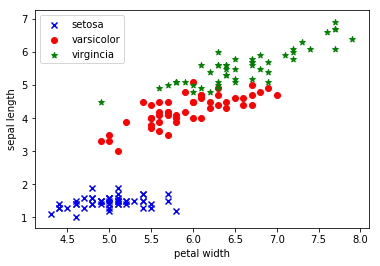

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:150, [0,2]].values
plt.scatter(X[0:50,0], X[0:50,1], color='blue', marker='x', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='red', marker='o', label='varsicolor')
plt.scatter(X[100:150,0], X[100:150,1], color='green', marker='*', label='virgincia')
plt.xlabel('petal width')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()


In [47]:
import csv
import random
import math
import operator

# 加载数据
def loadDataset(filename, split, trainingSet=[], testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
    return trainingSet, testSet
# 计算欧氏距离
def EuclidDist(instance1, instance2, len):
    distance = 0.0
    for x in range(len):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
# 寻找未知点的邻居
def getNeighbors(trainSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainSet)):
        dist = EuclidDist(testInstance, trainSet[x], length)
        distances.append((trainSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
# 定义判断归属
def getClass(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        instance_class = neighbors[x][-1]
        if instance_class in classVotes:
            classVotes[instance_class] += 1
        else:
            classVotes[instance_class] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
# 模型评估
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)) * 100.0)

def main():
    trainingSet, testSet = loadDataset('./csv/iris.data', 0.70)
    print('训练集合样本数', repr(len(trainingSet)))
    print('测试集合样本数', repr(len(testSet)))
    predictions = []
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getClass(neighbors)
        predictions.append(result)
        print('>预测=' + repr(result) + ',实际=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('精确度为：' + repr(accuracy))

main()

训练集合样本数 108
测试集合样本数 42
>预测='Iris-setosa',实际='Iris-setosa'
>预测='Iris-setosa',实际='Iris-setosa'
>预测='Iris-setosa',实际='Iris-setosa'
>预测='Iris-setosa',实际='Iris-setosa'
>预测='Iris-setosa',实际='Iris-setosa'
>预测='Iris-setosa',实际='Iris-setosa'
>预测='Iris-setosa',实际='Iris-setosa'
>预测='Iris-setosa',实际='Iris-setosa'
>预测='Iris-setosa',实际='Iris-setosa'
>预测='Iris-setosa',实际='Iris-setosa'
>预测='Iris-setosa',实际='Iris-setosa'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-versicolor'
>预测='Iris-versicolor',实际='Iris-ve